Global Power Plant Database
Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

`Fuel Type Aggregation`
- We define the "Fuel Type" attribute of our database based on common fuel categories. 

`Prediction`<br>
We need to make two predictions
1. primary_fuel
2. capacity_mw 

## EDA

In [3]:
df.shape

(907, 27)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

**Findings:**
1. We have 12 object type columns and 15 numeric columns
2. Several columns have been identified with only 1 unique value, while some have been identified as containing only null values

In [7]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [8]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [9]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [10]:
df.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)

In [11]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [12]:
df.drop("name",axis=1,inplace=True)

In [13]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [14]:
df.drop("gppd_idnr",axis=1,inplace=True)

In [15]:
df["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

Most of the information in "owner" column is null, and the rest of the information is object type with 280 unique values, making it irrelevant for our predictions.

In [16]:
df.drop("owner",axis=1,inplace=True)

In [17]:
df.drop("url",axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2013  0 non-null      float64
 9   generation_gwh_2014  398 non-null    float64
 10  generation_gwh_2015  422 non-null    float64
 11  generation_gwh_2016  434 non-null    float64
 12  generation_gwh_2017  440 non-null    float64
 13  generation_gwh_2018  448 non-null    float64
 14  generation_gwh_2019  0 non-null      float64
dtypes: float64(11), object(4)
memory usage: 

In [19]:
df.drop(columns=["generation_gwh_2013","generation_gwh_2019"],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


## Managing null values

In [21]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [22]:
df.shape

(907, 13)

In [23]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [24]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [25]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


**Findings:**
1. longitude, commissioning_year, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 have high skewness with some far reaching outliers.
2. latitude is numerical in nature with very low skewness and outliers.
3. other_fuel1 and geolocation_source are object data types

In [26]:
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [27]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

## Feature extraction

In [28]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [29]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [30]:
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

We can extract insights from plant age instead of using the information on when the plant was commissioned.

In [31]:
df['plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)
# using 2019 as the information in the dataset was available till the year 2019, but the column was dropped for reasons specified earlier 

In [32]:
df.head(10)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
5,250.0,23.7689,68.6447,Coal,Oil,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,14.0
6,60.0,10.4547,77.0078,Hydro,Oil,Central Electricity Authority,WRI,157.558250,152.195200,61.421350,89.629600,48.327150,49.0
7,192.0,32.2258,77.2070,Hydro,Oil,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850,9.0
8,290.0,16.3300,75.8863,Hydro,Oil,Central Electricity Authority,WRI,480.594950,144.434200,402.029750,439.372100,406.377900,15.0
9,210.0,23.1642,81.6373,Coal,Oil,Central Electricity Authority,WRI,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,11.0


In [33]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


## Primary Findings

1. no more null values in the dataset
2. there is presence of lot of outliers, with skewness across columns

## Checking categorical and numerical features for data analysis and visualization

In [34]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [35]:
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'plant_age']


## Data Visualization

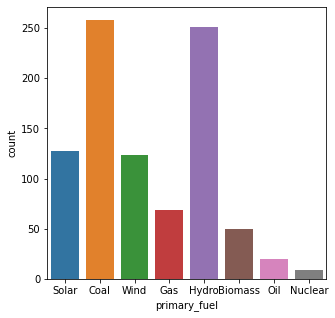

In [167]:
plt.figure(figsize=(5,5))
sns.countplot(df['primary_fuel'])
plt.show()

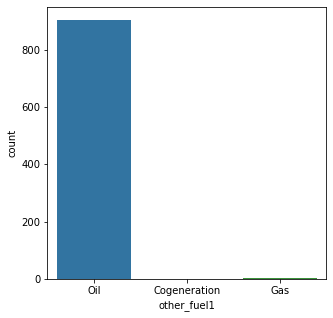

In [168]:
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

In [169]:
print(df["other_fuel1"].value_counts())

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


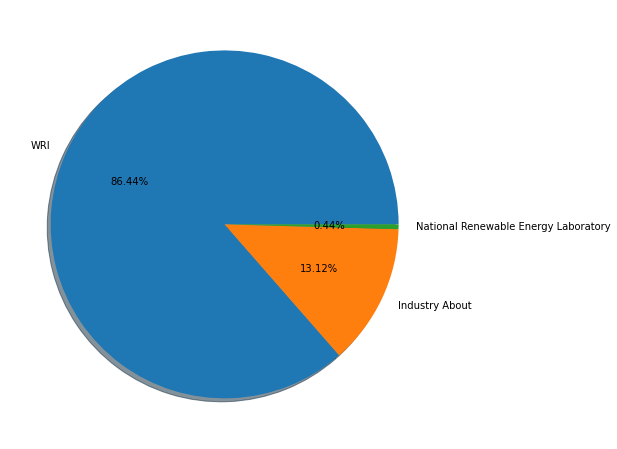

In [170]:
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

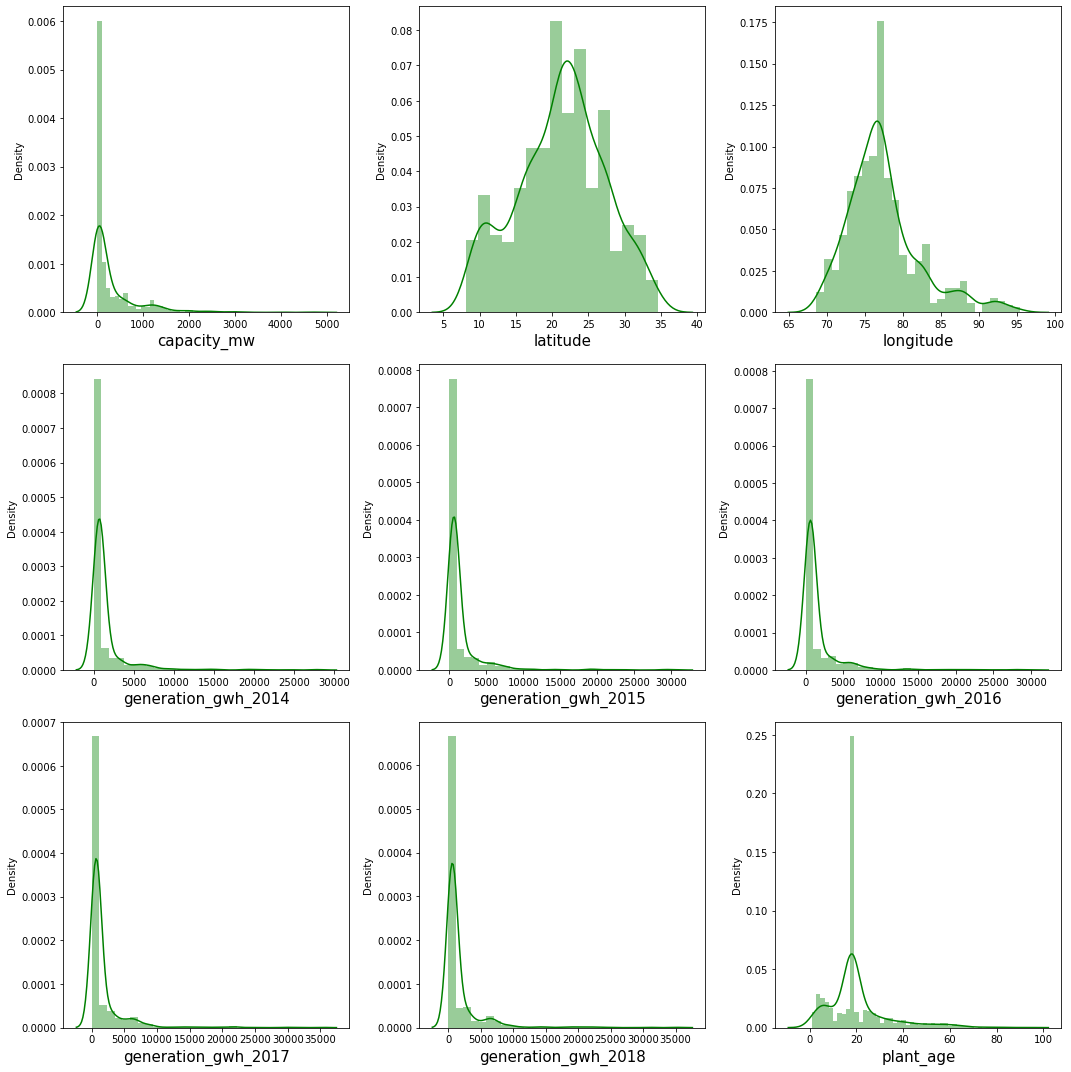

In [171]:
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

**Findings:**
1. Data is not normally distributed, except in latitude and logitude, with longitude having some skewness.
2. All other numerical columns show right skewness

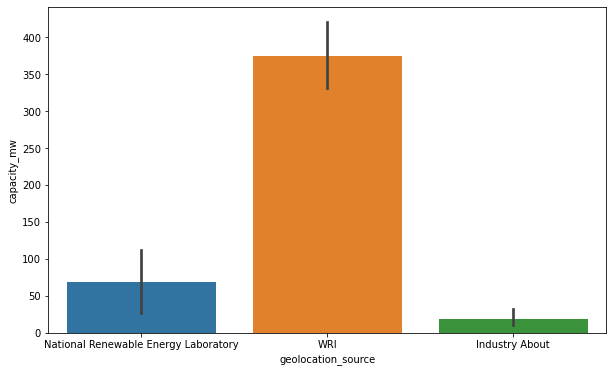

In [172]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

<AxesSubplot:title={'center':'Comparision between plant_age and capacity_mw'}, xlabel='plant_age', ylabel='capacity_mw'>

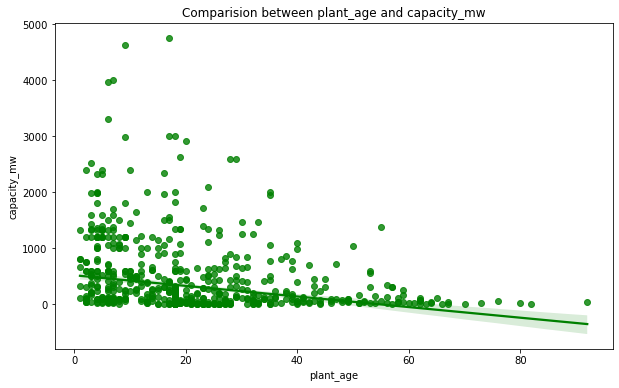

In [173]:
plt.figure(figsize=[10,6])
plt.title('Comparision between plant_age and capacity_mw')
sns.regplot(df['plant_age'],df['capacity_mw'],color = "g")

**Finding:** There exists a negative linear relationship between the two columns, i.e. new plants have higher capacity as compared to older plants.

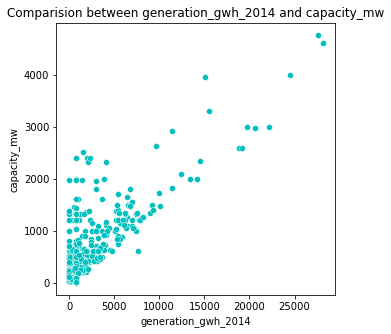

In [174]:
plt.figure(figsize = (5,5))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df,color="c")
plt.show()

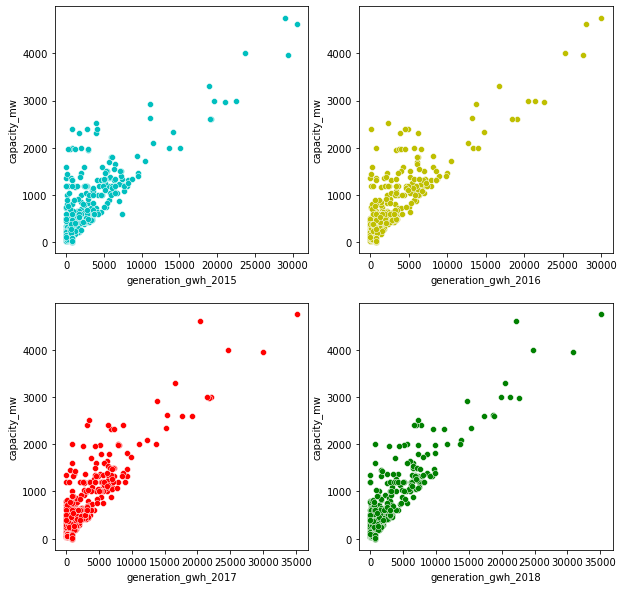

In [175]:
fig,axes=plt.subplots(2,2,figsize=(10,10))

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="c")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="y")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="r")

# Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="g")
plt.show()

**Findings:**
1. postive linear relationship between generation_gwh_yyyy and capacity_mw
2. capacity of plant increases with generation growth

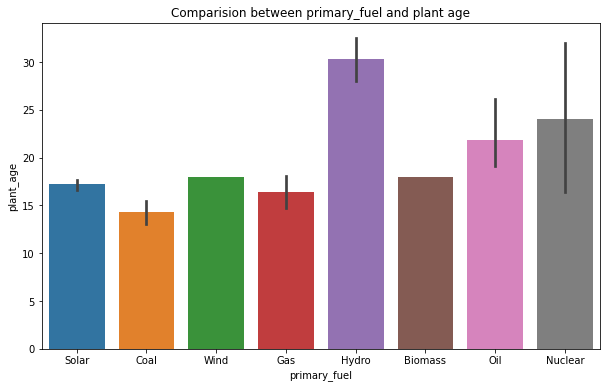

In [176]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and plant age")
sns.barplot(x = "primary_fuel", y = "plant_age", data = df)
plt.show()

**Findings:**
1. older plants use hydro, nuclear and oil
2. younger plants use coal, gas, biomass, wind and solar

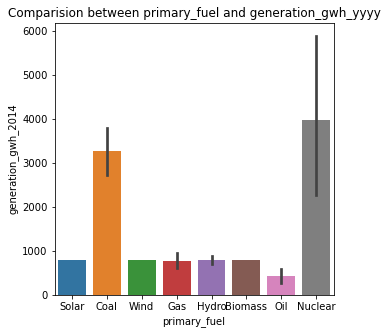

In [177]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df)
plt.show()

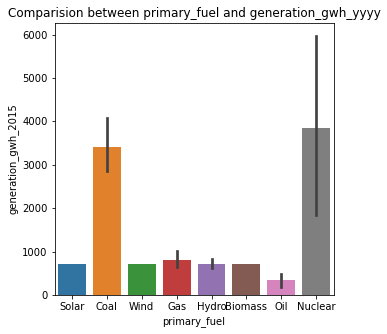

In [178]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df)
plt.show()

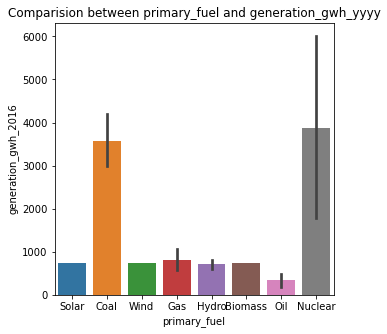

In [179]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df)
plt.show()

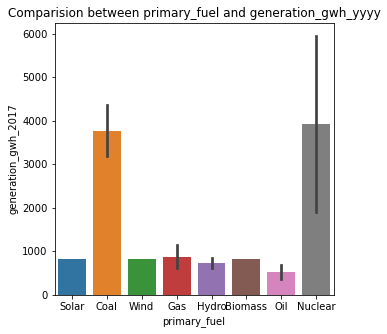

In [180]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df)
plt.show()

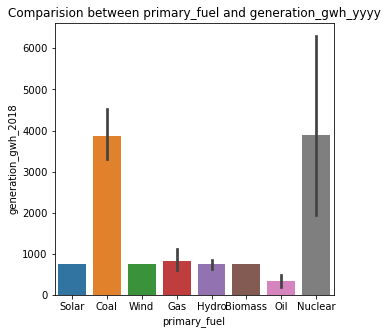

In [181]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)
plt.show()

**Findings:**
1. nuclear and coal have high generation across all years
2. remaining fuel sources have comparatively lower generation figures

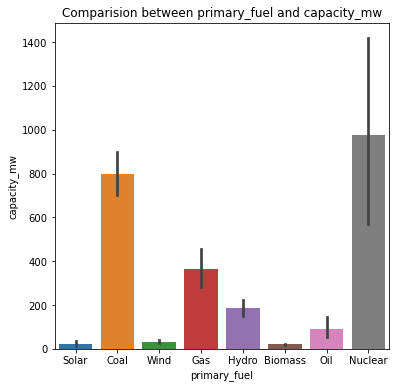

In [182]:
plt.figure(figsize = (6,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

**Finding:** capacity of generating electricity is high in Nuclear and Coal plants, with very low capacity in solar, wind and biomass plants

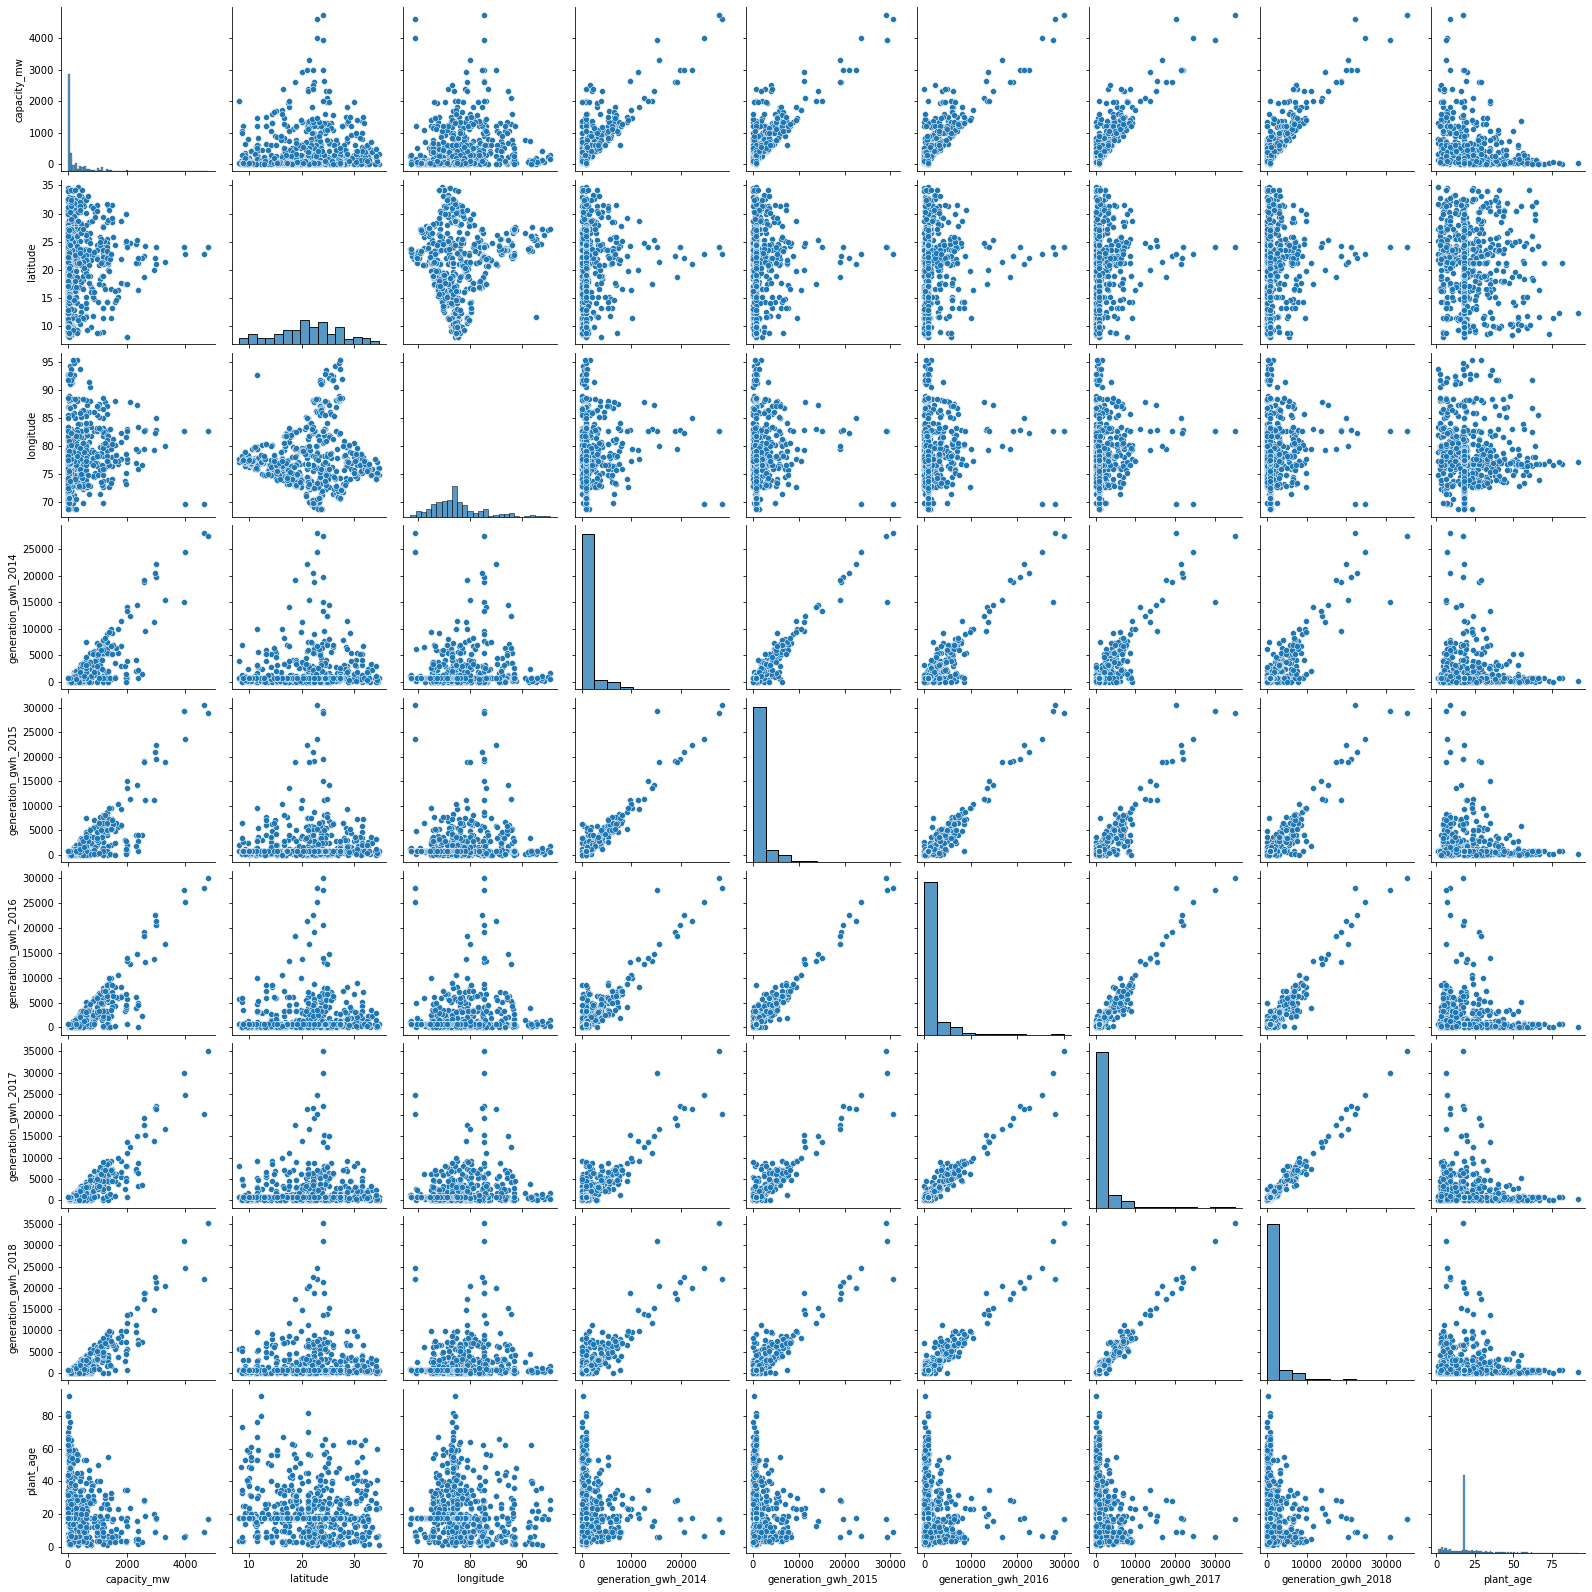

In [183]:
sns.pairplot(df)

**Findings:**
1. gives the pairwise relation between the columns
2. features have strong linear relationship and correlation with each other
3. `interesting fact`: the plotting of latitudinal and longitudinal values of the power plants from the database bring out an approximate shape of India, considering the dataset pertains to information of power plants across India

## Outlier check

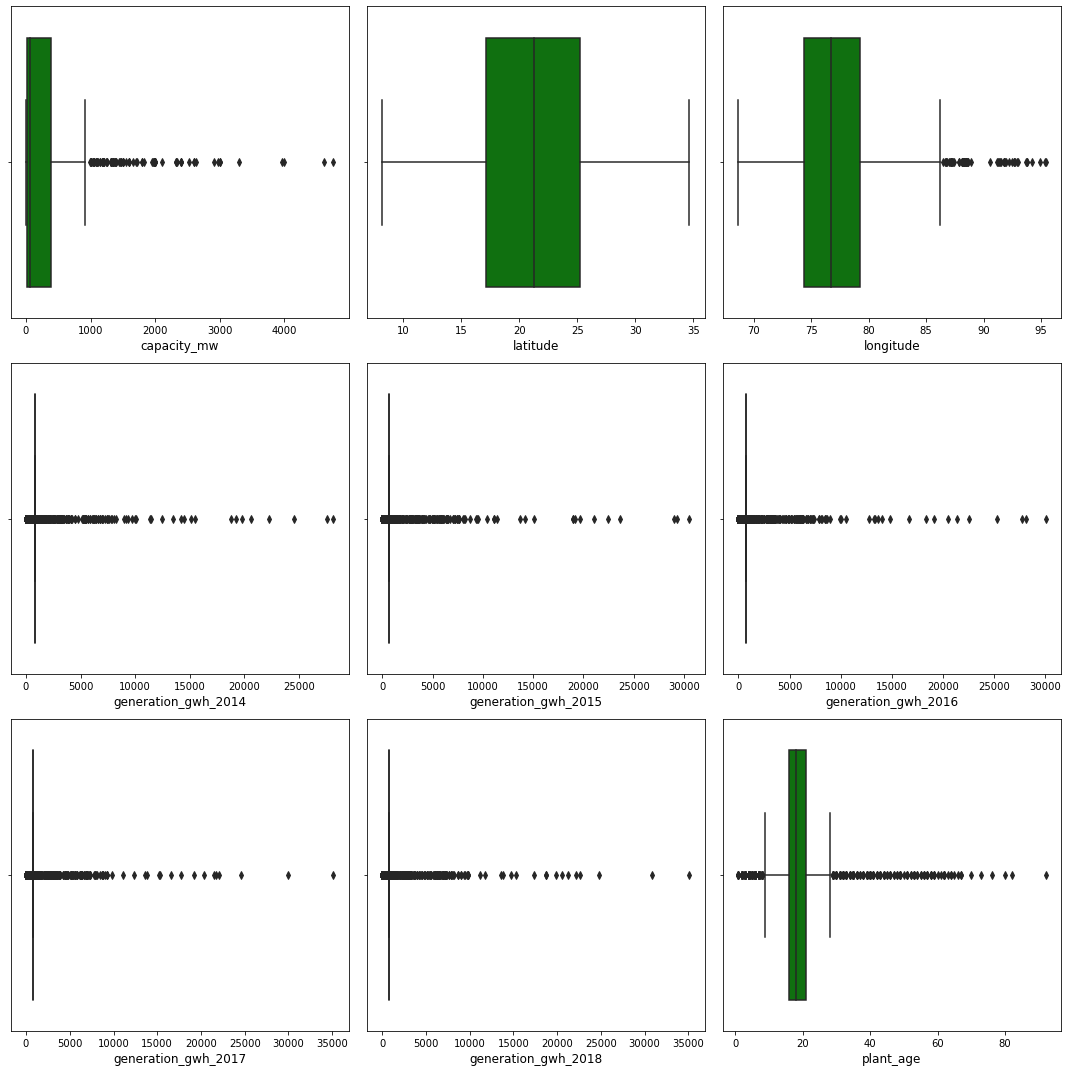

In [184]:
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

All columns have outliers present in them, except for latitude

In [185]:
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']]

In [186]:
z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [187]:
new_df = df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


In [188]:
print(df.shape)
print(new_df.shape)

(907, 13)
(851, 13)


In [189]:
loss = (907-851)/907*100
loss

6.174200661521499

We have a data loss of 6.17%, which is acceptable

## Encoding categorical columns

In [190]:
categorical_col = ['primary_fuel','other_fuel1','source','geolocation_source']

In [191]:
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)

In [192]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


## Establishing correlations

In [193]:
corr = new_df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


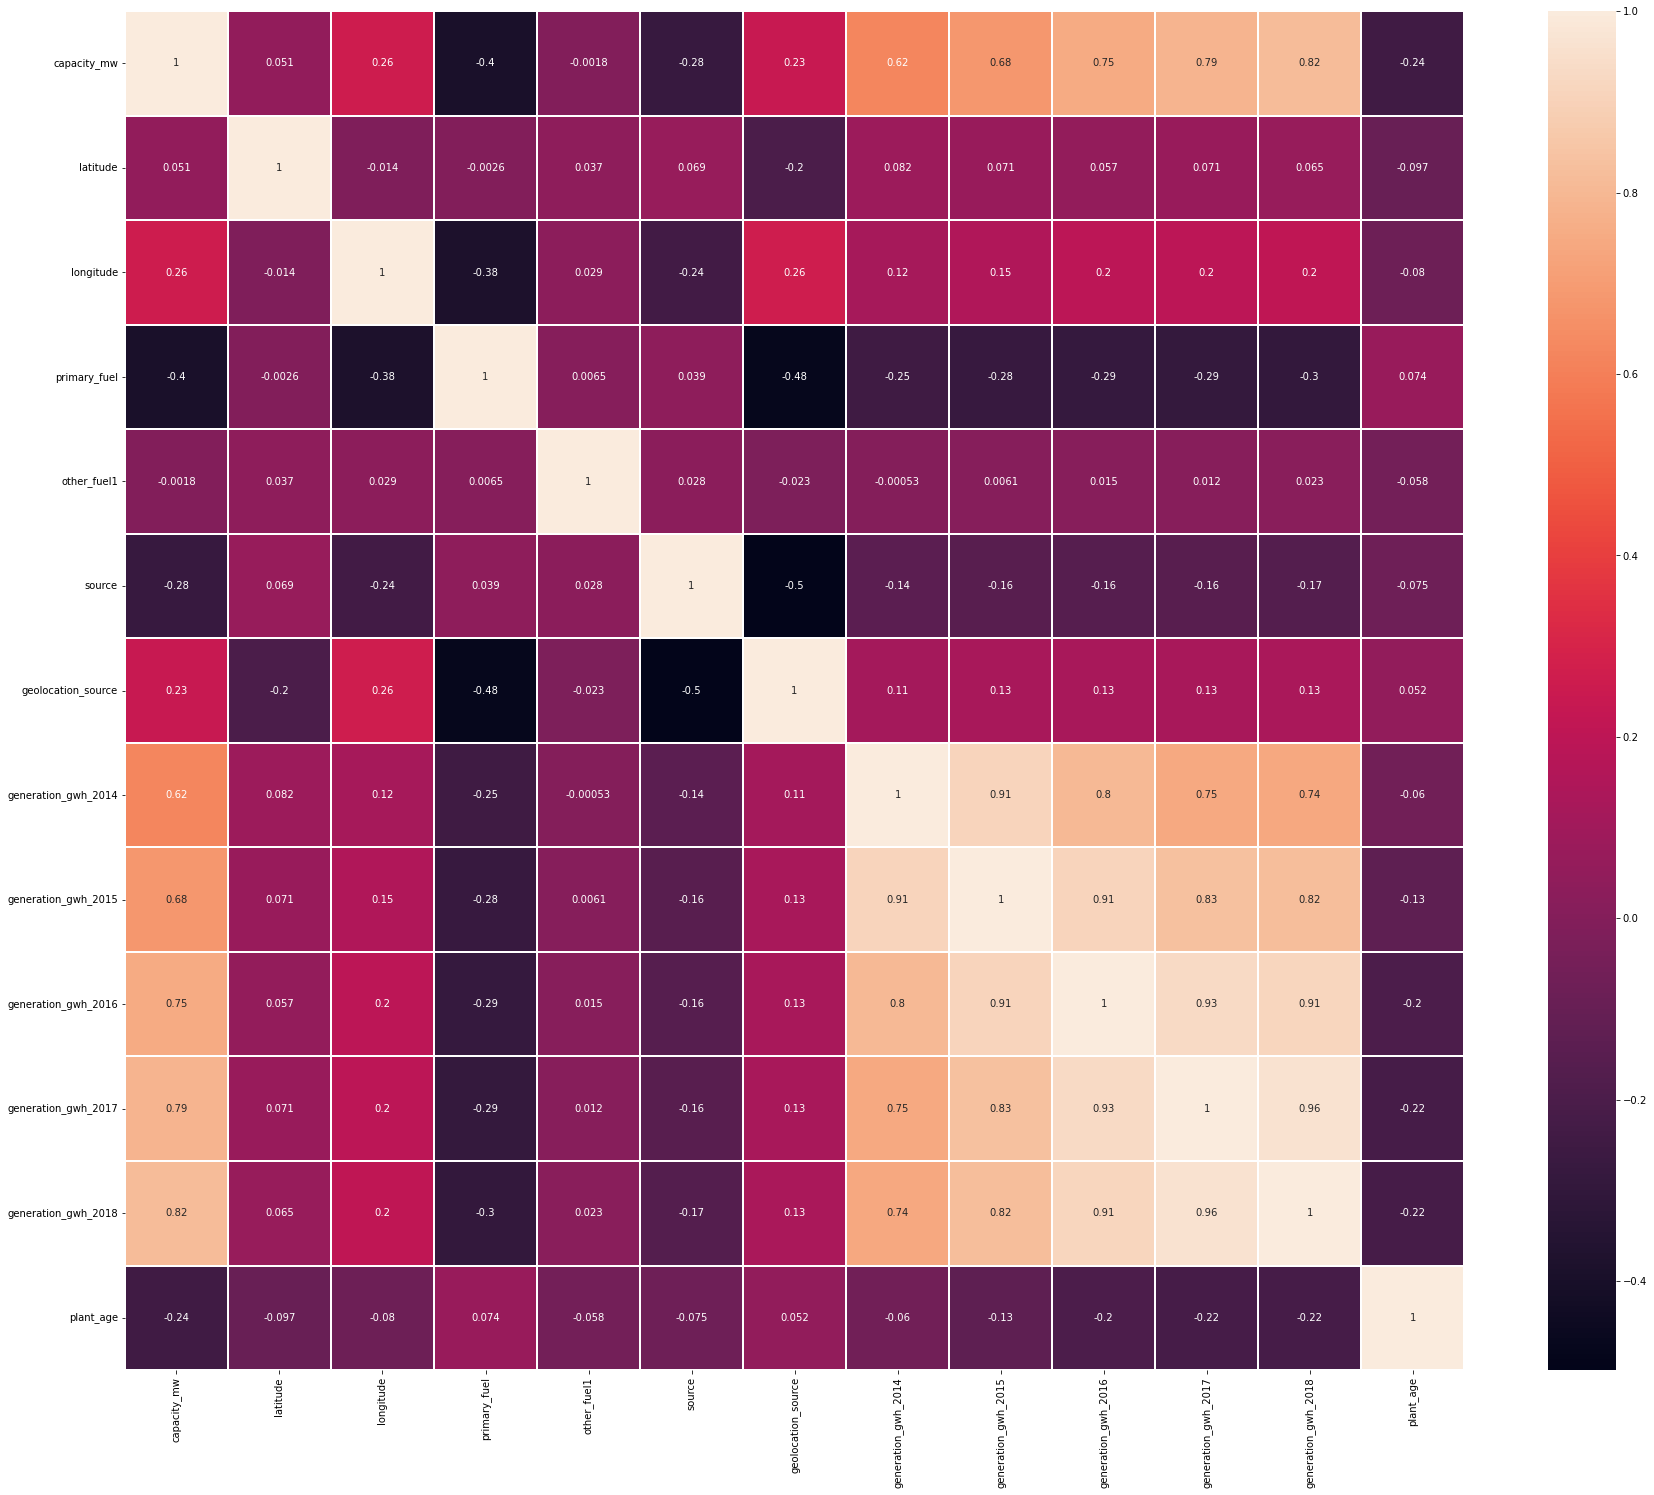

In [194]:
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=0.1,annot=True)
plt.show()

**Findings:**
<br><br>
**`capacity_mw`**
<br>
- capacity_mw is highly positively correlated with the features pertaining to generation_gwh
- capacity_mw is negatively correlated to plant_age, source and primary_fuel
- capacity_mw has very little correlation with other_fuel1 and lattitude
<br><br>

**`primary_fuel`**
<br>
- primary_fuel has low correlation with plant_age, other_fuel1 and source
- primary_fuel is negatively correlated with geological_source, longitude,capacity_mw, and generation_gwh_yyyy
- primary_fuel has very little correlation with other_fuel1 and lattitude

## Correlation between capacity_mw and other features

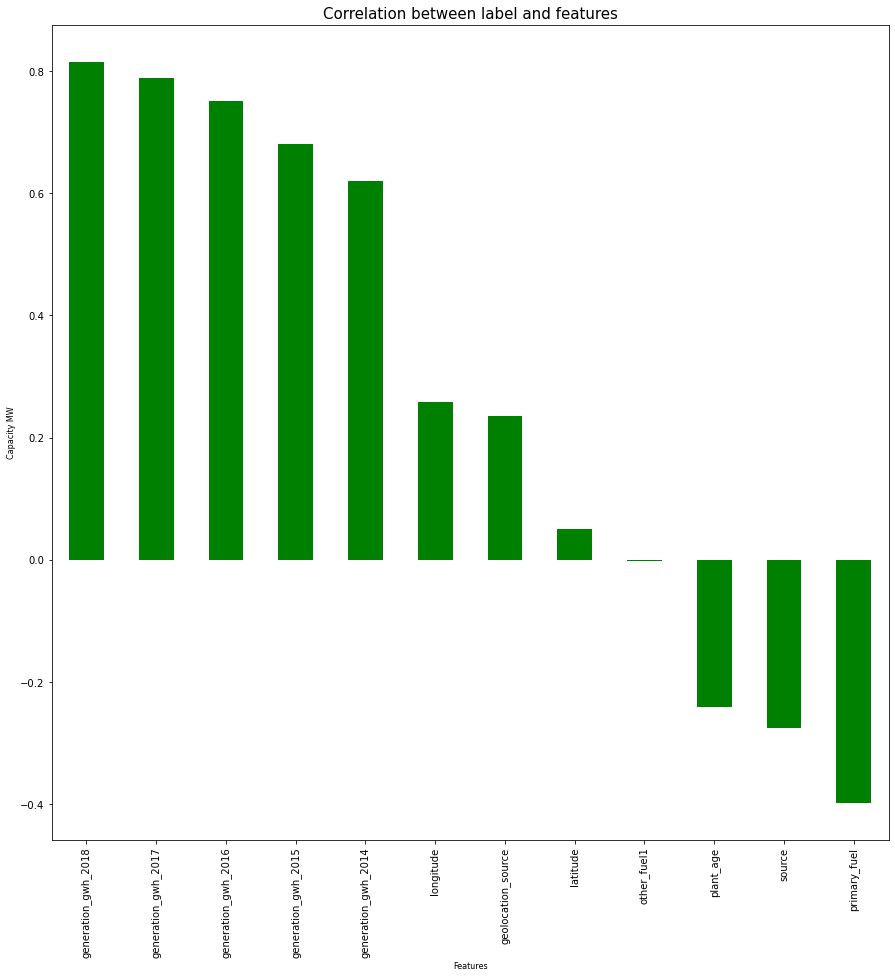

In [195]:
plt.figure(figsize=(15,15))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=8)
plt.ylabel('Capacity MW',fontsize=8)
plt.title('Correlation between label and features',fontsize=15)
plt.show()

## Correlation between primary_fuel and other features

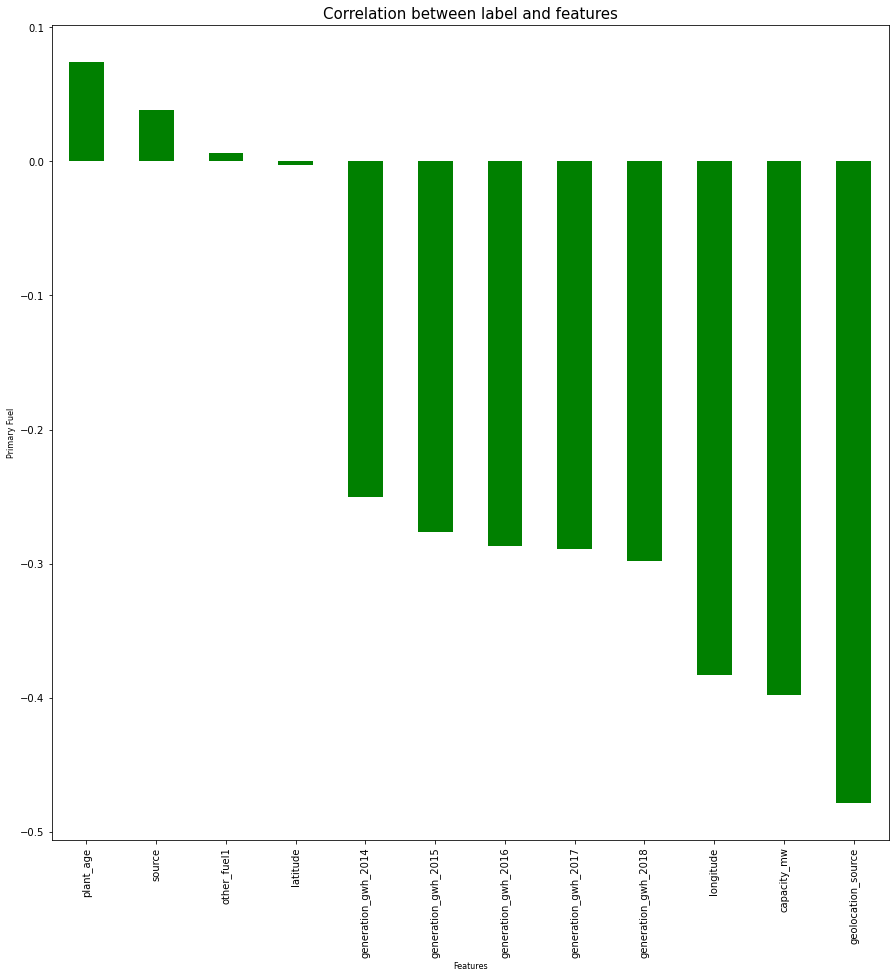

In [196]:
plt.figure(figsize=(15,15))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=8)
plt.ylabel('Primary Fuel',fontsize=8)
plt.title('Correlation between label and features',fontsize=15)
plt.show()

**Findings:** From the bar plots above, for each of the prediction required from the dataset, it is evident that latitude and other_fuel1 have very less correlation with the respective target columns. Therefore, it would be safe to drop the columns.

In [197]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


# Required prediction 1: `capacity_mw`

In [198]:
x = new_df.drop("capacity_mw",axis=1)
y = new_df['capacity_mw']

In [199]:
print(x.shape,"\n")
print(y.shape)

(851, 10) 

(851,)


## Skewness check

In [200]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            851 non-null    float64
 1   primary_fuel         851 non-null    int64  
 2   source               851 non-null    int64  
 3   geolocation_source   851 non-null    int64  
 4   generation_gwh_2014  851 non-null    float64
 5   generation_gwh_2015  851 non-null    float64
 6   generation_gwh_2016  851 non-null    float64
 7   generation_gwh_2017  851 non-null    float64
 8   generation_gwh_2018  851 non-null    float64
 9   plant_age            851 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 73.1 KB


In [201]:
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
plant_age              1.280800
dtype: float64

In [202]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']

scaler = PowerTransformer(method = 'yeo-johnson')

In [203]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [204]:
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
plant_age              0.037156
dtype: float64

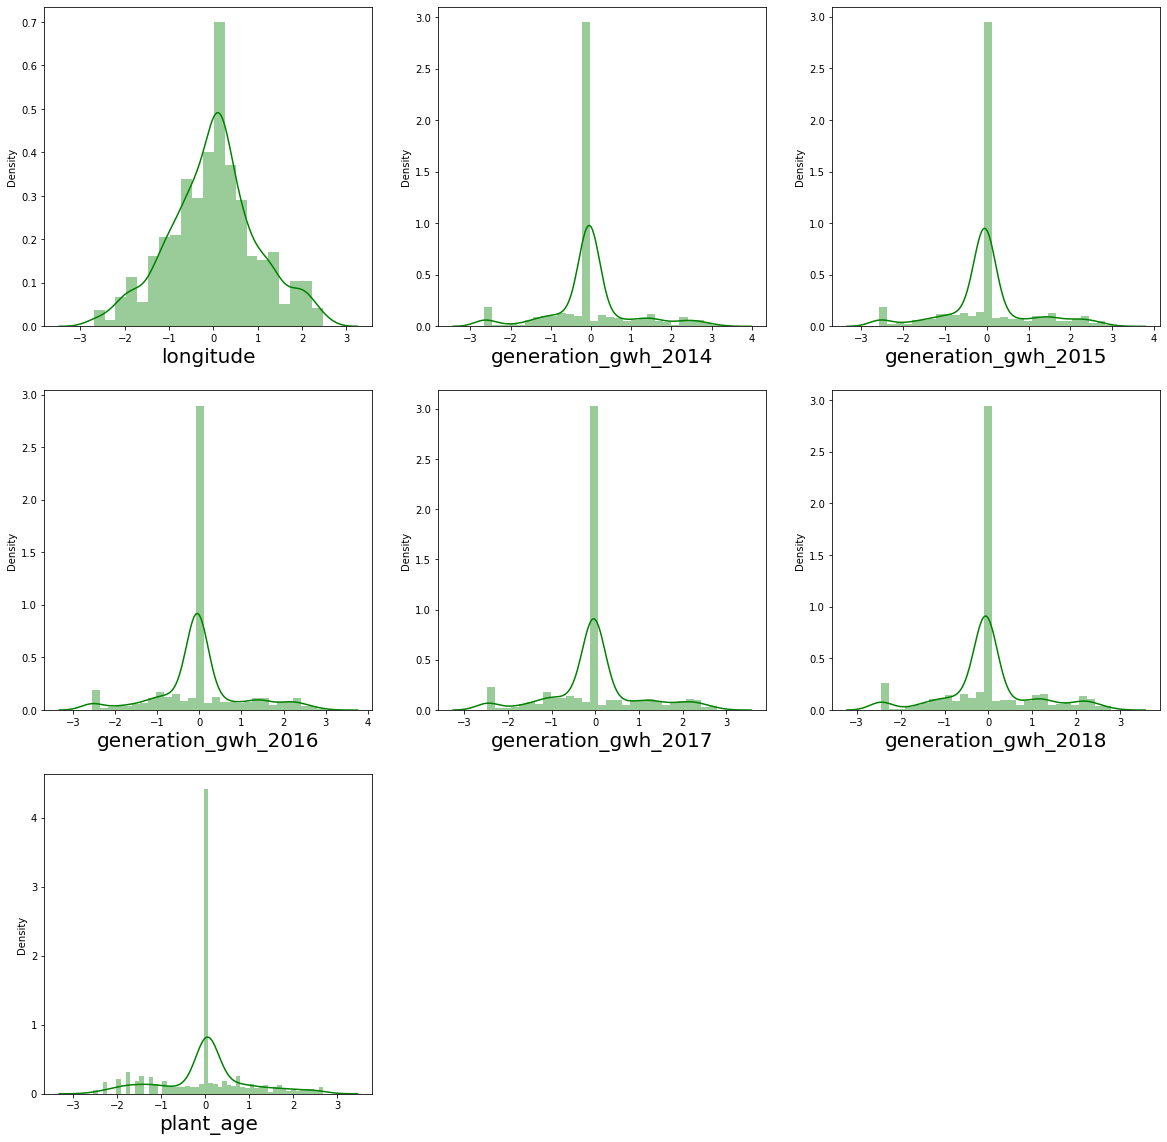

In [205]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

Skewness has been removed

## Using StandardScaler

In [206]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


## Multicollinearity Check

In [207]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.310001,longitude
1,1.682873,primary_fuel
2,1.503736,source
3,1.875773,geolocation_source
4,3.604587,generation_gwh_2014
5,6.181987,generation_gwh_2015
6,9.956820,generation_gwh_2016
7,9.749451,generation_gwh_2017
8,8.951311,generation_gwh_2018
9,1.103741,plant_age


All the features have a variance inflation factor of less than 10, so we are good to go as multicollinearity will not be an issue here.

## Model Building

In [208]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.8611893266371943 at Random_state 84


In [209]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=maxRS)

In [210]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_rfr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_rfr))
print("MSE:",metrics.mean_squared_error(y_test,pred_rfr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

R2_Score: 0.8622704000895626
MAE: 90.01829748960171
MSE: 22843.240496882765
RMSE: 151.13980447546822


In [211]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_dtr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_dtr))
print("MSE:",metrics.mean_squared_error(y_test,pred_dtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

R2_Score: 0.69428901318481
MAE: 116.11660818713452
MSE: 50703.912585964914
RMSE: 225.1752930184946


In [212]:
# KNN Regressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_knn))
print("MAE:",metrics.mean_absolute_error(y_test,pred_knn))
print("MSE:",metrics.mean_squared_error(y_test,pred_knn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))

R2_Score: 0.8446546795753684
MAE: 90.15348304093568
MSE: 25764.908319146667
RMSE: 160.51451124165274


In [213]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_gbr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_gbr))
print("MSE:",metrics.mean_squared_error(y_test,pred_gbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_gbr)))

R2_Score: 0.8480480582756802
MAE: 92.0702349293129
MSE: 25202.097087584043
RMSE: 158.7516837314932


## Model cross validation

In [214]:
print("Cross validation score for Random Forest Regressor:", cross_val_score(rfr,x,y,cv=5).mean(),"\n")
print("Cross validation score for Decision Tree Regressor:", cross_val_score(dtr,x,y,cv=5).mean(),"\n")
print("Cross validation score for KNN Regressor:", cross_val_score(knn,x,y,cv=5).mean(),"\n")
print("Cross validation score for Gradient Boosting Regressor:", cross_val_score(gbr,x,y,cv=5).mean())

Cross validation score for Random Forest Regressor: 0.7754912255264481 

Cross validation score for Decision Tree Regressor: 0.5793756368024233 

Cross validation score for KNN Regressor: 0.72438355945289 

Cross validation score for Gradient Boosting Regressor: 0.7502102209145481


#### It is clearly evident from the R2 scores and the cross validation scores that `Random Forest` is the best model for the dataset.

## Hyperparameter Tuning

In [215]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,100],
             'max_depth':[2,4,5,6]}

In [216]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [217]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 100]})

In [218]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

In [219]:
best_mod = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=100)

In [220]:
best_mod.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2')

In [221]:
rfr_pred = best_mod.predict(x_test)
acc = r2_score(y_test,rfr_pred)
print(acc*100)

88.3661111723877


### `Our Random Forest Regression model gives us an accuracy score of 85.48%`

## Saving the model

In [222]:
joblib.dump(best_mod,"capacity-pred-global-power-plant-database.pkl")

['capacity-pred-global-power-plant-database.pkl']

In [223]:
load_mod=joblib.load("capacity-pred-global-power-plant-database.pkl")

In [224]:
print(load_mod.predict(x_test))

[1169.11092353 1186.48729953  948.73175381   31.87322032   64.46089484
 1458.31427852 1127.23121814 1419.20283988   45.56415067   41.35581339
  124.7800735   135.15937137  182.04265239   40.51413212   36.05975036
  196.35454579  330.42612927   46.14493213  125.50337899  608.95424497
   30.38923041  733.4609227    38.30648452   29.53286256   29.4064251
   45.10760566   62.62670624   39.79030745   45.24095876   37.21707705
  443.38576715   36.05975036   32.45137219   29.72443875  297.92814793
   32.45137219  238.95202958   32.45137219   32.5827189    77.40999674
  171.52934024   29.55938555   32.55619591   32.87151385  175.86030159
  264.53492538   36.05975036   28.58313753   33.52193409   78.31355576
 1411.11793411  183.16303315  681.41499445   32.45137219 1652.23948483
  648.47511253   62.96155789   36.03322738   31.16842927  270.83593013
  254.22312662  109.14735835   33.52193409  104.96371898   90.53006771
   37.21707705   42.73886194  999.96252283   32.45137219  261.12535802
   91.3

In [225]:
a = np.array(y_test)
predicted = np.array(best_mod.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1050.0,1169.110924
1,1650.0,1186.487300
2,720.0,948.731754
3,10.0,31.873220
4,5.0,64.460895
...,...,...
166,62.5,144.726072
167,22.5,32.451372
168,135.0,236.556480
169,600.0,770.478309


# Required prediction 2: `primary_fuel`

In [226]:
x_pf = new_df.drop("primary_fuel",axis=1)
y_pf = new_df["primary_fuel"]

In [227]:
print(x_pf.shape,"\n")
print(y_pf.shape)

(851, 10) 

(851,)


## Skewness Check

In [228]:
x_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          851 non-null    float64
 1   longitude            851 non-null    float64
 2   source               851 non-null    int64  
 3   geolocation_source   851 non-null    int64  
 4   generation_gwh_2014  851 non-null    float64
 5   generation_gwh_2015  851 non-null    float64
 6   generation_gwh_2016  851 non-null    float64
 7   generation_gwh_2017  851 non-null    float64
 8   generation_gwh_2018  851 non-null    float64
 9   plant_age            851 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 73.1 KB


In [229]:
x_pf.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
plant_age              1.280800
dtype: float64

In [230]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']
scaler = PowerTransformer(method='yeo-johnson')

In [231]:
x_pf[skew] = scaler.fit_transform(x_pf[skew].values)
x_pf[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [232]:
x_pf.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
plant_age              0.037156
dtype: float64

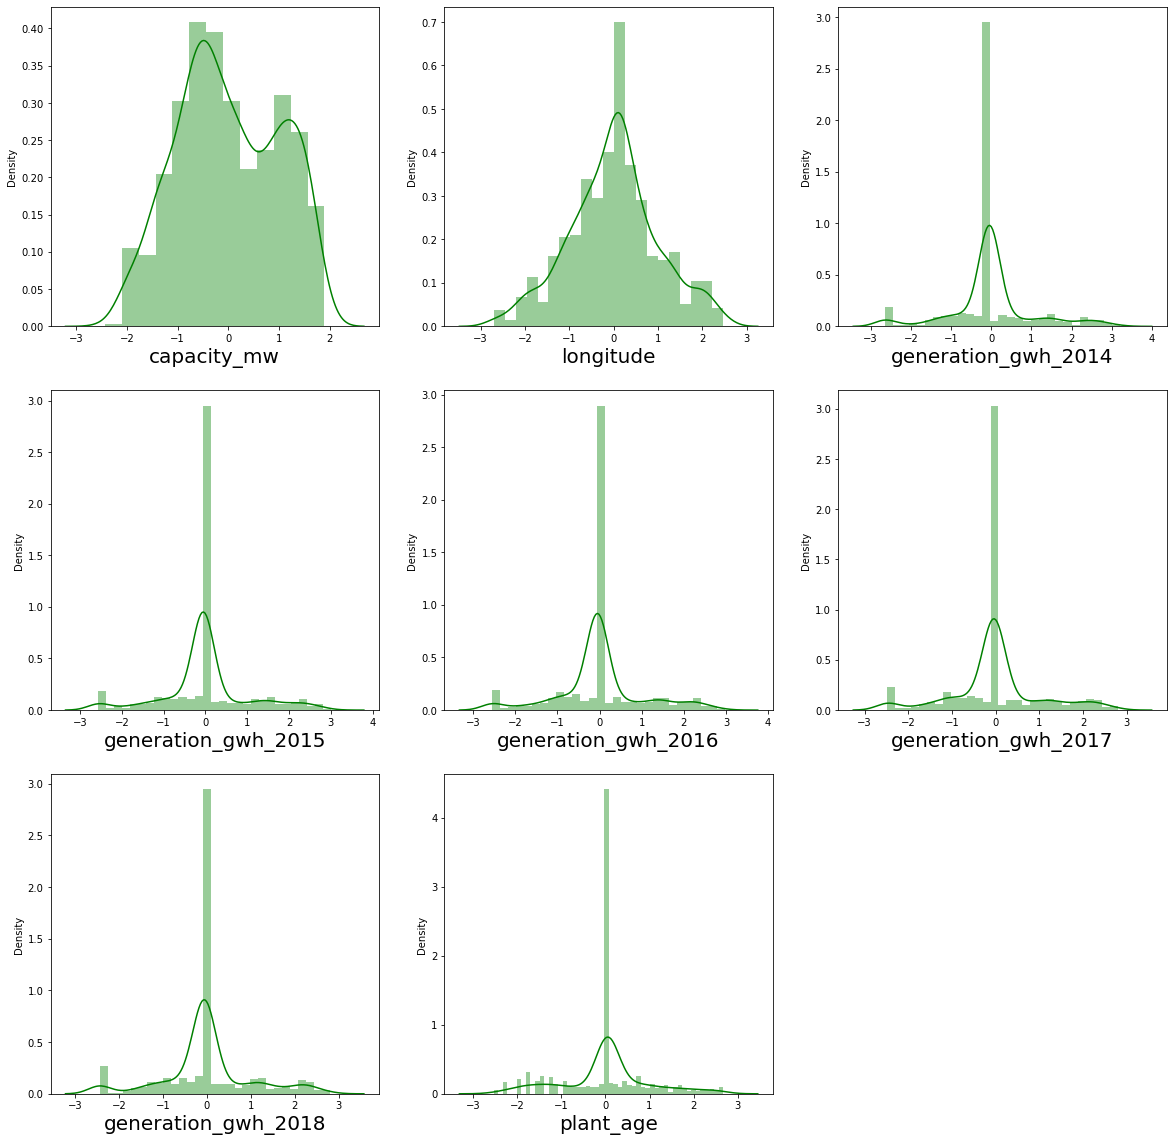

In [233]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in x_pf[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_pf[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

Skewness is removed

In [234]:
scaler = StandardScaler()
x_pf = pd.DataFrame(scaler.fit_transform(x_pf),columns = x_pf.columns)
x_pf

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


Data bias has been removed

In [235]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_pf.values,i)
    for i in range(len(x_pf.columns))]
vif["Features"] = x_pf.columns
vif

,VIF values,Features
0,1.812831,capacity_mw
1,1.193721,longitude
2,1.413003,source
3,1.590920,geolocation_source
4,3.623098,generation_gwh_2014
5,6.190488,generation_gwh_2015
6,9.960383,generation_gwh_2016
7,9.766254,generation_gwh_2017
8,8.960982,generation_gwh_2018
9,1.155462,plant_age


All the features have a variance inflation factor of less than 10, so we are good to go as multicollinearity will not be an issue here.

In [236]:
y_pf.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

**Findings:**
1. primary_fuel has multiple classes, thereby creating a multiclassification prediction problem
2. data in primary_fuel does not appear to be balanced

In [237]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_pf,y_pf = SM.fit_resample(x_pf,y_pf)

In [238]:
y_pf.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

In [239]:
x_pf.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


## Model Building

In [240]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_pf_train,x_pf_test,y_pf_train,y_pf_test = train_test_split(x_pf,y_pf,test_size=.20,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_pf_train,y_pf_train)
    pred = DTC.predict(x_pf_test)
    acc = accuracy_score(y_pf_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.9133858267716536 at random_state 4


In [241]:
x_pf_train,x_pf_test,y_pf_train,y_pf_test = train_test_split(x_pf,y_pf,test_size=.20,random_state=maxRS)

In [242]:
# decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_pf_train,y_pf_train)
predDTC = DTC.predict(x_pf_test)
print(accuracy_score(y_pf_test,predDTC))
print(confusion_matrix(y_pf_test,predDTC))
print(classification_report(y_pf_test,predDTC))

0.9081364829396326
[[49  2  0  0  0  1  0  0]
 [ 0 37  4  4  2  1  0  0]
 [ 1  4 35  6  1  0  0  0]
 [ 0  2  3 42  0  2  0  0]
 [ 0  2  0  0 46  0  0  0]
 [ 0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.79      0.77      0.78        48
           2       0.83      0.74      0.79        47
           3       0.81      0.86      0.83        49
           4       0.94      0.96      0.95        48
           5       0.91      1.00      0.95        42
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        56

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381



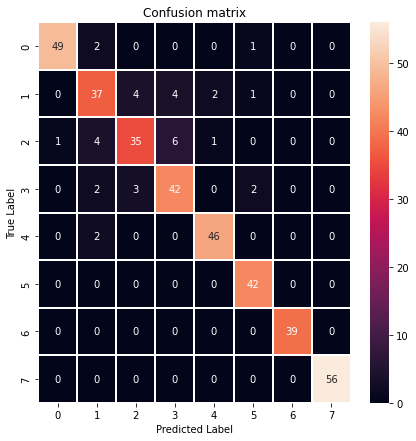

In [243]:
cm = confusion_matrix(y_pf_test,predDTC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [244]:
# Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_pf_train,y_pf_train)
predRFC = RFC.predict(x_pf_test)
print(accuracy_score(y_pf_test,predRFC))
print(confusion_matrix(y_pf_test,predRFC))
print(classification_report(y_pf_test,predRFC))

0.926509186351706
[[51  0  0  0  0  1  0  0]
 [ 1 38  4  3  2  0  0  0]
 [ 1  4 40  1  0  1  0  0]
 [ 0  5  3 40  1  0  0  0]
 [ 0  0  0  0 48  0  0  0]
 [ 0  1  0  0  0 41  0  0]
 [ 0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.79      0.79      0.79        48
           2       0.85      0.85      0.85        47
           3       0.91      0.82      0.86        49
           4       0.94      1.00      0.97        48
           5       0.95      0.98      0.96        42
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        56

    accuracy                           0.93       381
   macro avg       0.93      0.93      0.93       381
weighted avg       0.93      0.93      0.93       381



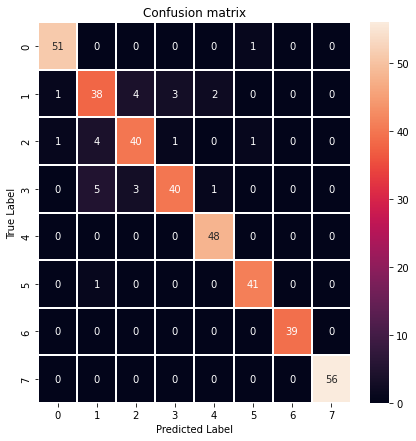

In [245]:
cm = confusion_matrix(y_pf_test,predRFC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [246]:
# SVC
svc = SVC()
svc.fit(x_pf_train,y_pf_train)
predsvc = svc.predict(x_pf_test)
print(accuracy_score(y_pf_test,predsvc))
print(confusion_matrix(y_pf_test,predsvc))
print(classification_report(y_pf_test,predsvc))

0.8057742782152231
[[49  0  0  0  0  0  0  3]
 [ 7 20  5  2  8  1  0  5]
 [ 1  2 33  3  1  5  0  2]
 [ 0  5  6 29  3  0  0  6]
 [ 0  0  0  0 48  0  0  0]
 [ 3  0  0  0  0 33  0  6]
 [ 0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        52
           1       0.74      0.42      0.53        48
           2       0.75      0.70      0.73        47
           3       0.85      0.59      0.70        49
           4       0.80      1.00      0.89        48
           5       0.85      0.79      0.81        42
           6       1.00      1.00      1.00        39
           7       0.72      1.00      0.84        56

    accuracy                           0.81       381
   macro avg       0.82      0.80      0.80       381
weighted avg       0.81      0.81      0.79       381



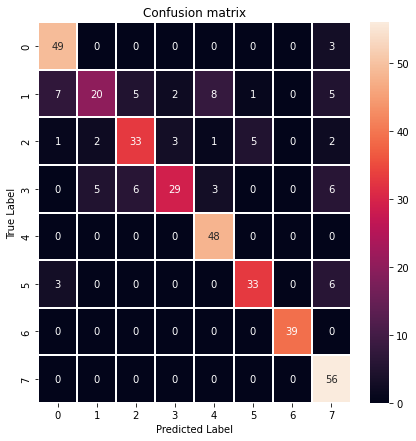

In [247]:
cm = confusion_matrix(y_pf_test,predsvc)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [248]:
# KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_pf_train,y_pf_train)
predknn = knn.predict(x_pf_test)
print(accuracy_score(y_pf_test,predknn))
print(confusion_matrix(y_pf_test,predknn))
print(classification_report(y_pf_test,predknn))

0.884514435695538
[[52  0  0  0  0  0  0  0]
 [ 7 31  2  1  3  2  0  2]
 [ 1  3 37  2  0  3  0  1]
 [ 0  3  6 36  1  0  0  3]
 [ 0  0  0  0 48  0  0  0]
 [ 4  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        52
           1       0.84      0.65      0.73        48
           2       0.82      0.79      0.80        47
           3       0.92      0.73      0.82        49
           4       0.92      1.00      0.96        48
           5       0.88      0.90      0.89        42
           6       1.00      1.00      1.00        39
           7       0.90      1.00      0.95        56

    accuracy                           0.88       381
   macro avg       0.89      0.88      0.88       381
weighted avg       0.89      0.88      0.88       381



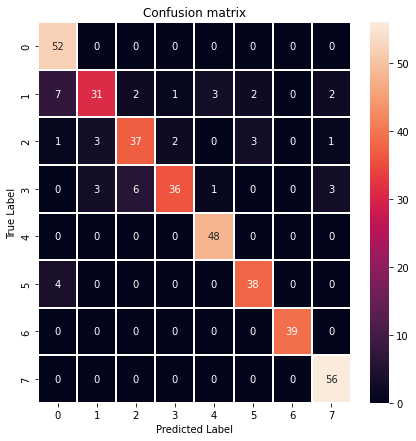

In [249]:
cm = confusion_matrix(y_pf_test,predknn)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

## Model Cross Validation

In [250]:
print("Cross Validation Score for Decision Tree Classifier:", cross_val_score(DTC,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for Random Forest Classifier:", cross_val_score(RFC,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for SVC:", cross_val_score(svc,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for KNN Classifier:", cross_val_score(knn,x_pf,y_pf,cv=5).mean())

Cross Validation Score for Decision Tree Classifier: 0.8749993092968642 

Cross Validation Score for Random Forest Classifier: 0.9075604365243818 

Cross Validation Score for SVC: 0.7977869871529217 

Cross Validation Score for KNN Classifier: 0.8539922641248792


#### It is clearly evident from the accuracy scores and the cross validation scores that `Random Forest Classifier` is the best model for the dataset.

## Hyperparameter Tuning

In [251]:
parameters = {'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
              'max_depth':[10,20,30],
              'min_samples_leaf':[2,3,5]}

In [252]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [253]:
GCV.fit(x_pf_train,y_pf_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5]})

In [254]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2}

In [255]:
best_mod1 = RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=20,min_samples_leaf=3)
best_mod1.fit(x_pf_train, y_pf_train)
pred = best_mod1.predict(x_pf_test)
acc = accuracy_score(y_pf_test,pred)
print(acc*100)

91.0761154855643


## Saving the model

In [256]:
joblib.dump(best_mod1,"primaryfuel-pred-global-power-plant-database.pkl")

['primaryfuel-pred-global-power-plant-database.pkl']

In [257]:
model = joblib.load('primaryfuel-pred-global-power-plant-database.pkl')

In [258]:
a = np.array(y_pf_test)
predicted = np.array(model.predict(x_pf_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_new

,Original,Predicted
0,1,1
1,0,0
2,1,1
3,4,4
4,2,2
...,...,...
376,1,1
377,0,0
378,4,4
379,5,1


# `END`